Preparando el dataset

In [1]:
from sklearn.datasets import load_breast_cancer
 
dataset = load_breast_cancer()

# Imprimo informacion para analizar el conjunto de datos
 
print("Los atributos de entrada son: {}.".format(dataset.feature_names))
print("Las clases que intentaremos predecir son: {}.".format(dataset.target_names))
print("El formato de la matriz de datos es: {}.".format(dataset.data.shape))
print("El formato de la matriz de eitquetas es: {}.".format(dataset.target.shape))

Los atributos de entrada son: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'].
Las clases que intentaremos predecir son: ['malignant' 'benign'].
El formato de la matriz de datos es: (569, 30).
El formato de la matriz de eitquetas es: (569,).


Conjunto de testeo y entrenamiento

In [12]:
# Divido los datos en conjunto de entrenamiento y evaluacion
from sklearn.model_selection import train_test_split
 
data_train, data_test, target_train, target_test = train_test_split(dataset.data,
                                                                    dataset.target,
                                                                    test_size = 0.2)
 
print("Ahora, el conjunto de entrenamiento tiene {} muestras y el de evaluación tiene {} muestras.".format(data_train.shape[0], data_test.shape[0]))

Ahora, el conjunto de entrenamiento tiene 341 muestras y el de evaluación tiene 228 muestras.


Arbol de decision

In [30]:
# Definicion de parametros para el entrenamiento del arbol de decision
criterion = 'entropy'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None

In [31]:
# Creamos el modelo y lo entrenamos
from sklearn.tree import DecisionTreeClassifier
 
tree_model = DecisionTreeClassifier(criterion = criterion,
                                    splitter = "best",
                                    max_depth = max_depth,
                                    min_samples_leaf = min_samples_leaf,
                                    min_samples_split = min_samples_split,
                                    max_leaf_nodes = max_leaf_nodes)
 
# Utilizamos el conjunto de datos de entrenamiento
 
tree_model.fit(data_train, target_train)

DecisionTreeClassifier(criterion='entropy')

Graficando el arbol

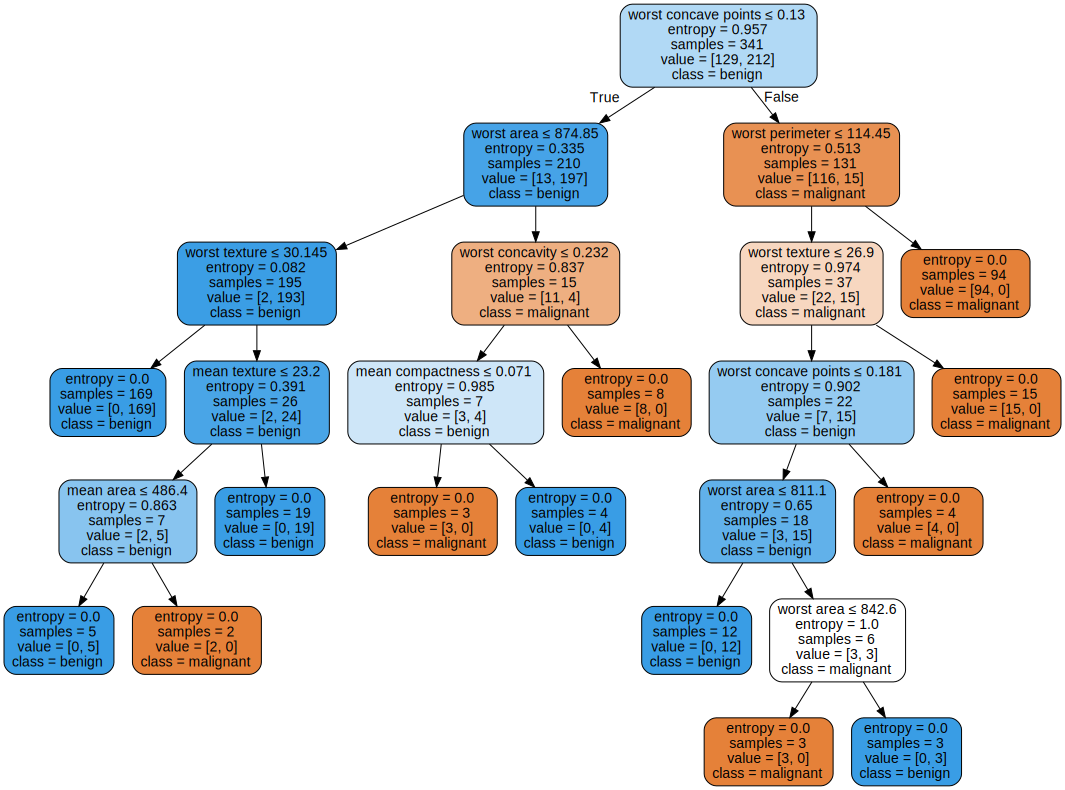

In [32]:
import graphviz
from sklearn import tree
 
# Funcion para generar en gráfico del arbol.
 
# NOTA: Para reutilizar esta funcion en otro Notebook hay que importar los mismos paquetes que se
# importan en esta celda.
def graph_tree(tree_model, feature_names=None, class_names=None):
 
  dot_data = tree.export_graphviz(tree_model, out_file=None,
                                  feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True,
                                  rounded=True,
                                  special_characters=True)  
 
  graph = graphviz.Source(dot_data)
  return graph

graph = graph_tree(tree_model, dataset.feature_names, dataset.target_names)
graph

  Evaluacion

In [33]:
from sklearn.metrics import accuracy_score

# Utilizo el conjunto de evaluación data_test para predecir mediante el arbol ya entrenado
target_predicted = tree_model.predict(data_test)

# Calculo el valor de accuracy obtenido
accuracy = accuracy_score(target_test, target_predicted)

print("El valor de accuracy obtenido es: {}".format(accuracy))

El valor de accuracy obtenido es: 0.9342105263157895


Sobreentrenamiento

In [42]:
# Chequeamos si el árbol esta sobreentrenado evaluandolo con algunos datos del conjunto de entrenamiento

target_predicted = tree_model.predict(data_train)

train_accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido es: {}".format(train_accuracy))

El valor de accuracy obtenido es: 1.0


Poda 

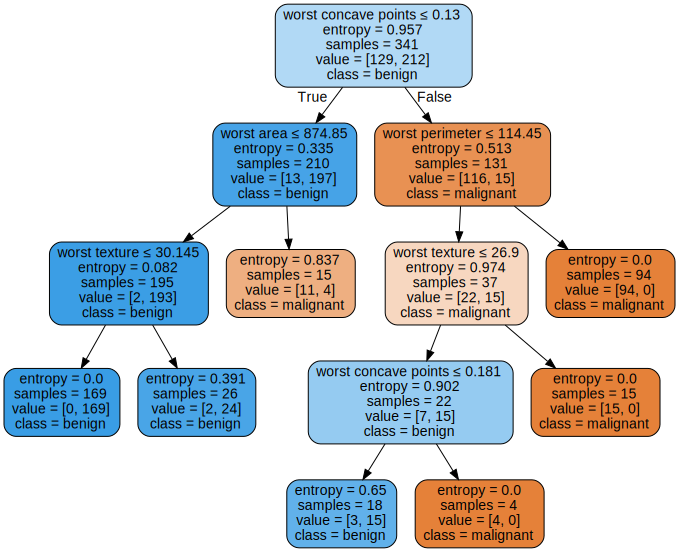

In [58]:
from sklearn.tree._tree import TREE_LEAF
from copy import deepcopy

# Funcion para podar un árbol.

# NOTA: Para reutilizar esta función en otra Notebook hay que importar los mismos paquetes que se
# importan en esta celda.

def is_leaf(tree_model, node_id):
  """
  Devuelve True si el nodo (node_id), pasado como
  argumento, es un nodo hoja del arbol (tree_model).
  Caso contrario retorna False.
  """
  return (tree_model.tree_.children_left[node_id] == TREE_LEAF and 
          tree_model.tree_.children_right[node_id] == TREE_LEAF)


def prune(tree_model, levels=1):
  """
  Realiza la poda del arbol pasado como argumento, de forma recursiva, eliminando niveles del mismo.

  Esta funcion replica el funcionamiento de su correspondiente par en Matlab:

          prune(tree_model, 'level', levels)
  """
  tree_model_copy = deepcopy(tree_model)

  def recursive(tree_model, node_id):

    if (is_leaf(tree_model, tree_model.tree_.children_left[node_id]) and
        is_leaf(tree_model, tree_model.tree_.children_right[node_id])):
      tree_model.tree_.children_left[node_id] = TREE_LEAF
      tree_model.tree_.children_right[node_id] = TREE_LEAF
    
    if tree_model.tree_.children_left[node_id] != TREE_LEAF:
      recursive(tree_model, tree_model.tree_.children_left[node_id])
      recursive(tree_model, tree_model.tree_.children_right[node_id])
      
    return tree_model
  
  for _ in range(levels):
    tree_model_copy = recursive(tree_model_copy, 0)

  return tree_model_copy


# Podo el árbol y lo grafico nuevamente
pruned_tree_model = prune(tree_model, 2)

graph = graph_tree(pruned_tree_model, dataset.feature_names, dataset.target_names)
graph

In [57]:
# Chequeamos si el árbol esta sobreentrenado evaluandolo con algunos datos del conjunto de entrenamiento

target_predicted = pruned_tree_model.predict(data_test)

test_accuracy = accuracy_score(target_test, target_predicted)

print("El valor de accuracy obtenido en el conjunto de evaluacion es: {}".format(test_accuracy))

target_predicted = pruned_tree_model.predict(data_train)

train_accuracy = accuracy_score(target_train, target_predicted)

print("El valor de accuracy obtenido en el conjunto de entrenamiento es: {}".format(train_accuracy))

El valor de accuracy obtenido en el conjunto de evaluacion es: 0.8903508771929824
El valor de accuracy obtenido en el conjunto de entrenamiento es: 0.9178885630498533
